## This The Homework for Loop Academy ML course - Shayan Karimi

## Preprocessing Echocardiogram Dataset ( I put comments and full explainations for each section) & Creating Pipeline for it with KNN model experiment.

In [122]:
import pandas as pd

path="https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"

df = pd.read_csv(path,error_bad_lines=False,header=None)   ### we set error_bad_lines == False because all attributes are empty and this line of dataset makes pronlem with the read_csv file
print("Done")

Done


b'Skipping line 50: expected 13 fields, saw 14\n'


In [123]:
df.shape             #### 131 samples and 13 attributes

(131, 13)

In [124]:
### now we set the column names for the dataset according to https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.names  file
column_names=["survival","still-alive","age-at-heart-attack","pericardial-effusion","fractional-shortening","epss","lvdd","wall-motion-score","wall-motion-index","mult","name","group","alive-at-1"]
df.columns=column_names

In [125]:
df.head()            

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [126]:
### since the dataset description menthiond that "gruop" attribute is not important we will delete this column
df = df.drop('group', 1)

In [127]:
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,0


In [128]:
#### since the "name" column is just the name of the patient we can delete this column accoridng to the datatset dscription
df = df.drop('name', 1)

In [129]:
#### now lets see the final dataset
df.head()

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,0
2,16,0,55,0,0.260,4,3.420,14,1,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,0


In [130]:
### see dataset dimension
df.shape                                 ### final correct dataset shape

(131, 11)

## handling Missing values in each Column

In [131]:
### now we want to handle the missing data lets look that how many data in our label is missing !
df_label_lost=df[df["alive-at-1"]=='?']

In [132]:
df_label_lost.shape        ### so we had 57 lost label -- from 131 smaple whcih is alot and we can not replace it easily it is better to remove the rows with missing labels

(57, 11)

In [133]:
### first we are going to replcae every "?" with Nan which makes computaion in pandas much more easier
import numpy as np

df=df.replace({'?':np.nan}).dropna(subset=["alive-at-1"])

### after removing empty price rows we should reset indexes
df.reset_index(drop = True, inplace = True)

In [134]:
df.shape ## after removing the empty label cells

(74, 11)

In [135]:
############ now lets handle the other columns missing values.

missing_data=df.isnull()

'''
Count missing values in each column  
'''

for col in missing_data.columns.values.tolist():
  print(col)
  print(missing_data[col].value_counts())
  print("*"*20)


survival
False    73
True      1
Name: survival, dtype: int64
********************
still-alive
False    74
Name: still-alive, dtype: int64
********************
age-at-heart-attack
False    73
True      1
Name: age-at-heart-attack, dtype: int64
********************
pericardial-effusion
False    74
Name: pericardial-effusion, dtype: int64
********************
fractional-shortening
False    70
True      4
Name: fractional-shortening, dtype: int64
********************
epss
False    66
True      8
Name: epss, dtype: int64
********************
lvdd
False    68
True      6
Name: lvdd, dtype: int64
********************
wall-motion-score
False    73
True      1
Name: wall-motion-score, dtype: int64
********************
wall-motion-index
False    73
True      1
Name: wall-motion-index, dtype: int64
********************
mult
False    73
True      1
Name: mult, dtype: int64
********************
alive-at-1
False    74
Name: alive-at-1, dtype: int64
********************


In [136]:
##  for survival attribute becuase we just have one missing data and it is numberical using mean mdeian is a good choice
'''
Here we can also use the above method directly but for using SimpleImpute i do it for my practice!
'''


from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')                                      
df['survival'] = imp1.fit_transform(df['survival'].to_numpy().reshape(-1,1))         

In [137]:
missing_data=df.isnull()
missing_data["survival"].value_counts()           ## we correct that missng value by the mean of others

False    74
Name: survival, dtype: int64

In [138]:
### for age-at-heart-attack attribute we use median since it is numberical
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
df['age-at-heart-attack'] = imp2.fit_transform(df['age-at-heart-attack'].to_numpy().reshape(-1,1)) 

In [139]:
missing_data=df.isnull()
missing_data["age-at-heart-attack"].value_counts()           ## we correct that missng value by using the median

False    74
Name: age-at-heart-attack, dtype: int64

In [140]:
## for fractional-shortening attribute we use mean
imp3 = SimpleImputer(missing_values=np.nan, strategy='mean')                                      
df['fractional-shortening'] = imp3.fit_transform(df['fractional-shortening'].to_numpy().reshape(-1,1)) 

In [141]:
missing_data=df.isnull()
missing_data["fractional-shortening"].value_counts()           ## we correct that missng value by the mean of others

False    74
Name: fractional-shortening, dtype: int64

In [142]:
## for epss we will use most-frequent method
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')                                      
df['epss'] = imp4.fit_transform(df['epss'].to_numpy().reshape(-1,1)) 

In [143]:
missing_data=df.isnull()
missing_data["epss"].value_counts()           ## we correct that missng value by replacing it with most frequent value at that column

False    74
Name: epss, dtype: int64

In [144]:
## for lvdd attribute we use mean method for replacing missing values
imp5 = SimpleImputer(missing_values=np.nan, strategy='mean')                                      
df['lvdd'] = imp5.fit_transform(df['lvdd'].to_numpy().reshape(-1,1)) 

In [145]:
missing_data=df.isnull()
missing_data["lvdd"].value_counts()           ## we correct that missng value by the mean of others

False    74
Name: lvdd, dtype: int64

In [146]:
## for wall-motion-score attribute we use mean method for replacing missing values
imp6 = SimpleImputer(missing_values=np.nan, strategy='mean')                                      
df['wall-motion-score'] = imp6.fit_transform(df['wall-motion-score'].to_numpy().reshape(-1,1)) 

In [147]:
missing_data=df.isnull()
missing_data["wall-motion-score"].value_counts()           ## we correct that missng value by the mean of others

False    74
Name: wall-motion-score, dtype: int64

In [148]:
## for wall-motion-index attribute we use mean method for replacing missing values
imp7 = SimpleImputer(missing_values=np.nan, strategy='mean')                                      
df['wall-motion-index'] = imp7.fit_transform(df['wall-motion-index'].to_numpy().reshape(-1,1)) 

In [149]:
missing_data=df.isnull()
missing_data["wall-motion-index"].value_counts()           ## we correct that missng value by the mean of others

False    74
Name: wall-motion-index, dtype: int64

In [150]:
## for mult attribute we use mean method for replacing missing values
imp8 = SimpleImputer(missing_values=np.nan, strategy='mean')                                      
df['mult'] = imp8.fit_transform(df['mult'].to_numpy().reshape(-1,1)) 

In [151]:
missing_data=df.isnull()
missing_data["mult"].value_counts()           ## we correct that missng value by the mean of others

False    74
Name: mult, dtype: int64

In [152]:
df.dtypes   ### for epss we need to change its type

survival                 float64
still-alive                int64
age-at-heart-attack      float64
pericardial-effusion       int64
fractional-shortening    float64
epss                      object
lvdd                     float64
wall-motion-score        float64
wall-motion-index        float64
mult                     float64
alive-at-1                object
dtype: object

In [153]:
df["epss"] = pd.to_numeric(df["epss"])

In [154]:
### Now lets convert our data frame into numpy array

y=df.pop("alive-at-1")
x=df

In [155]:
y.shape

(74,)

In [156]:
x.shape

(74, 10)

In [157]:
y_full=np.asarray(y)
x_full=np.asarray(x)

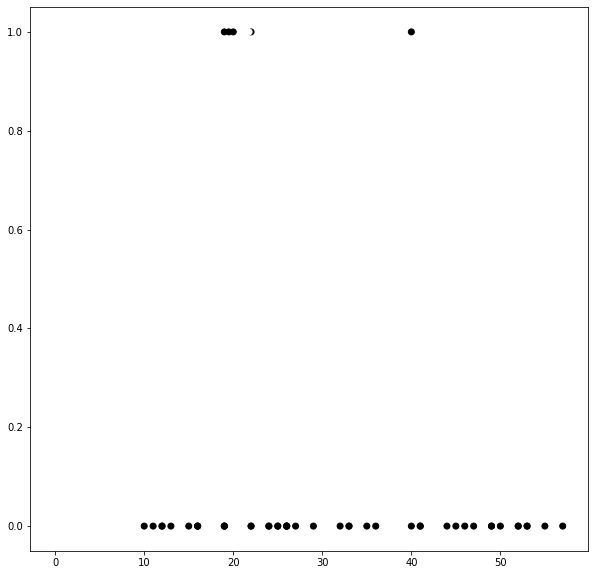

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(x_full[:, 0], x_full[:, 1], c=y_full);

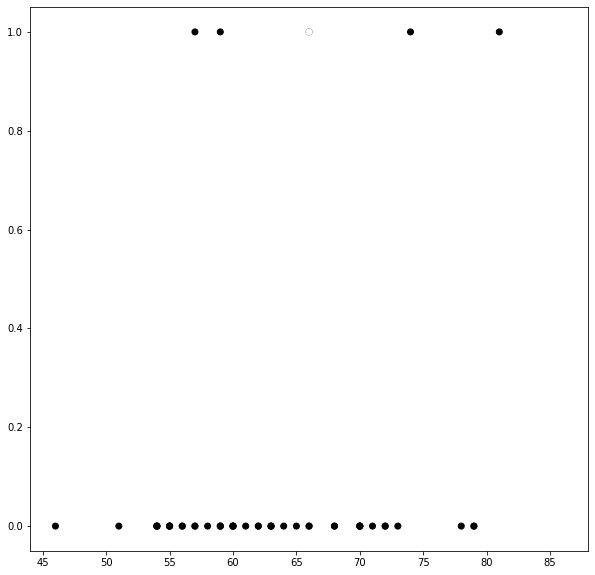

In [159]:
plt.figure(figsize=(10, 10))
plt.scatter(x_full[:, 2], x_full[:, 1], c=y_full);

In [161]:
x_full.mean(axis=0)


array([21.78123288,  0.39189189, 64.33147297,  0.2027027 ,  0.21905714,
       11.217     ,  4.78591176, 15.34808219,  1.43379452,  0.77693151])

In [162]:
x_full.var(axis=0)

array([3.08107259e+02, 2.38312637e-01, 6.77572046e+01, 1.61614317e-01,
       1.15431050e-02, 6.16891421e+01, 5.34849641e-01, 3.04893477e+01,
       2.07964404e-01, 2.98974954e-02])

## Standardization Step

In [171]:
### here we are going to use RobustScaler becuase we have outlier data in some columns
#### RobustScaler method  ==> we can handle outlier and also normalize
### Quantiles are important here
from sklearn.preprocessing import RobustScaler

rbscaler = RobustScaler(quantile_range=(45, 55)).fit(x_full)
x_rb=rbscaler.transform(x_full)

In [172]:
x_rb.mean(axis=0)

array([ 6.77077626e-01,  3.91891892e-01,  1.33147297e+00,  2.02702703e-01,
       -4.08081977e-16,  8.48083624e-01,  5.34174062e-01,  1.34808219e+00,
        6.36257438e-01, -7.25479452e-01])

In [173]:
x_rb.var(axis=0)

array([3.42341399e+01, 2.38312637e-01, 6.77572046e+01, 1.61614317e-01,
       4.01775307e+01, 2.99574559e+01, 1.49869652e+01, 3.04893477e+01,
       1.10479267e+01, 1.91343970e+02])

## Normalization Step

In [175]:
### now we want to go to next stage and normalize our data

from sklearn.preprocessing import Normalizer, normalize
from numpy.linalg import norm

nrm = Normalizer(norm='l2').fit(x_rb)

x_rb_nrm = nrm.transform(x_rb)              ###  now we normalize our robustscaler x data with Norm 2

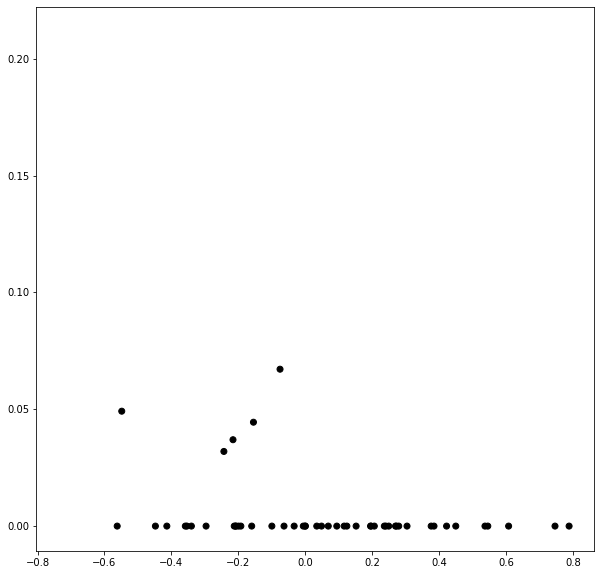

In [176]:
plt.figure(figsize=(10, 10))
plt.scatter(x_rb_nrm[:, 4], x_rb_nrm[:, 1], c=y_full);

##PCA Step

In [177]:
##### Now are going to PCA for dimension reduction

from sklearn.decomposition import PCA

In [178]:
pca = PCA(n_components=0.96).fit(x_rb_nrm)     ### we are doing pca on our scaled normalized data

In [179]:
x_rb_nrm_pca = pca.transform(x_rb_nrm)

In [180]:
x_rb_nrm_pca.shape          ### we can see that if we want to resotre the 96 percent info we can delete 4 attributes

(74, 6)

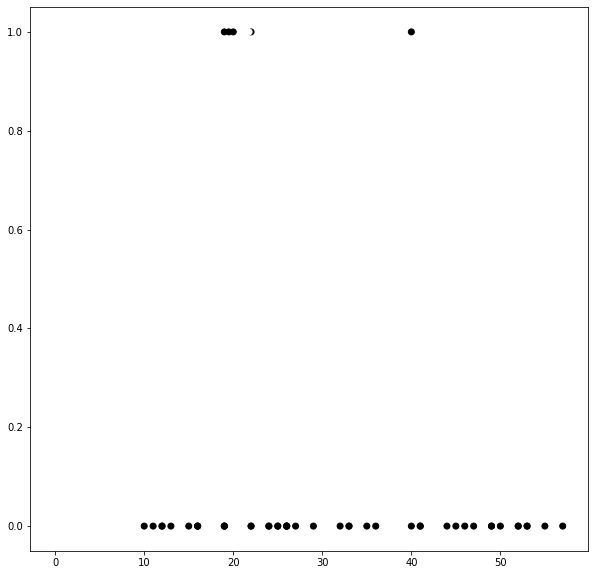

In [183]:
plt.figure(figsize=(10, 10))
plt.scatter(x_full[:, 0], x_full[:, 1], c=y_full);
#### with Out pCA

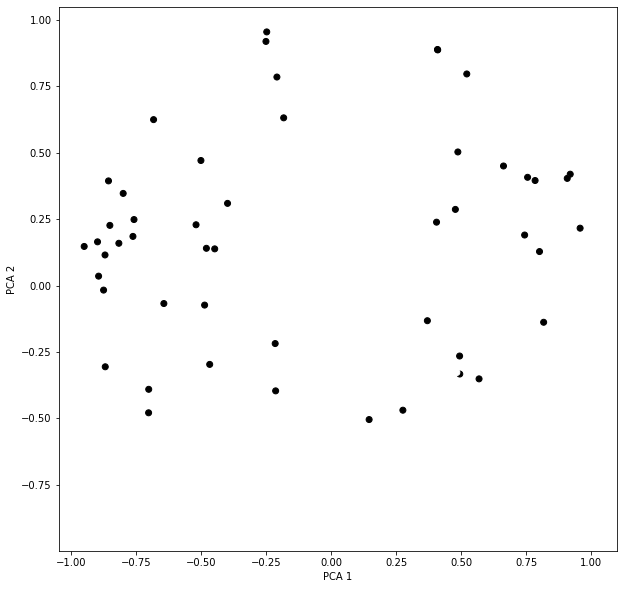

In [185]:
plt.figure(figsize=(10, 10))
plt.scatter(x_rb_nrm_pca[:, 0], x_rb_nrm_pca[:, 1], c=y_full);

plt.xlabel('PCA 1');
plt.ylabel('PCA 2');

#with PCA

## Final Pipeline Step

In [195]:
### Now We want to create the Final PipeLine and Mix all step above together
### For example we want to use KNN Algorithm for our model

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)

steps = [('Standardization', RobustScaler(quantile_range=(45, 55))),
         ('Normalization',Normalizer(norm='l2')), 
         ('dimension redoction', PCA(n_components=5)),
         ('Classifier', KNN(n_neighbors=5))]

pipeline = Pipeline(steps).fit(x_train,y_train)


In [196]:
y_pred = pipeline.predict(x_test)

## Evaluation Step

In [197]:
acc = 0
for i in range(y_pred.shape[0]):
    if y_pred[i] == y_test[i]:
        acc += 1
acc /= y_pred.shape[0]

print('accuracy is: {}'.format(acc))                  #### 80% is our accuracy

accuracy is: 0.8
